# Check for hotter-is-better pattern for $r_m$

In [137]:
rm(list=ls())
graphics.off()

require('tidyverse')
require('cowplot')
require('patchwork')

In [138]:
# Plot mass corrected value of $r_m$ at Topt against the peak temperature for $r_m$

rm_data <- read_csv('../results/rm_optSizeScaling.csv') %>% 
           group_by(species) %>% 
           slice(which.max(rm_opt)) %>%
           arrange(curve_ID)

head(rm_data)

Rows: 16000 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): species
dbl (19): temp, alpha, alphaLwr, alphaUpr, curve_ID, bmax, bmaxLwr, bmaxUpr,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,zLwr,zUpr,zj,zjLwr,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,319.804921,275.465005,1,1.436440,1.121607,1.961897,0.01799820,0.02208532,0.01475193,0.001623460,0.002043007,0.001342057,0.01,0.01029796,0.008264924,0.01267333,159.800000
Halyomorpha halys,29.77477,29.803247,34.801644,26.560714,2,6.254051,4.554398,7.961462,0.01385860,0.01773847,0.01161998,0.003232184,0.008066385,0.002886158,0.01,0.07630718,0.068032804,0.08009549,158.810000
Aedes aegypti,33.10811,5.430507,6.127546,4.998063,3,8.966715,7.036053,10.245358,0.04764627,0.06101070,0.03811462,0.099661965,0.139029976,0.076551191,0.01,0.19781352,0.185258393,0.19309717,1.999167
Anthonomus grandis,29.45946,11.006110,13.433526,9.905019,4,6.292496,5.375335,9.707858,0.04069540,0.05092071,0.03527753,0.036932530,0.040833878,0.034256786,0.01,0.14365573,0.131714677,0.15718676,15.600000
Paracoccus marginatus,27.74775,11.249195,14.345214,9.048877,5,14.925416,10.254063,46.015815,0.05028941,0.05979512,0.04536469,0.015482998,0.019926309,0.012954600,0.01,0.19174884,0.164058195,0.24364983,3.365000
Acyrthosiphon pisum,24.32432,6.716411,7.095765,6.380087,6,7.047066,6.716012,7.461219,0.08542108,0.09083668,0.08085102,0.077074000,0.096483235,0.058133260,0.01,0.22007128,0.206557839,0.23220396,2.365000


## Mass-corrected $r_{m,opt}$ vs $r_m$ $T_{pk}$'s

In [139]:
rm_data$kT <- 1/(8.617333262145 * 10^-5 * (rm_data$temp+273.15))

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



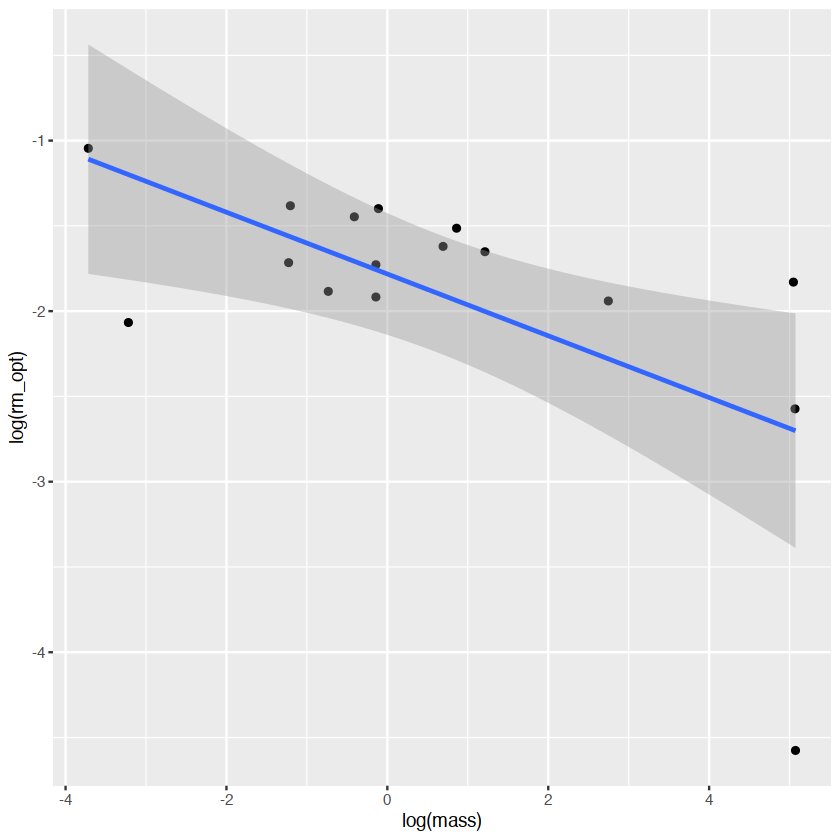

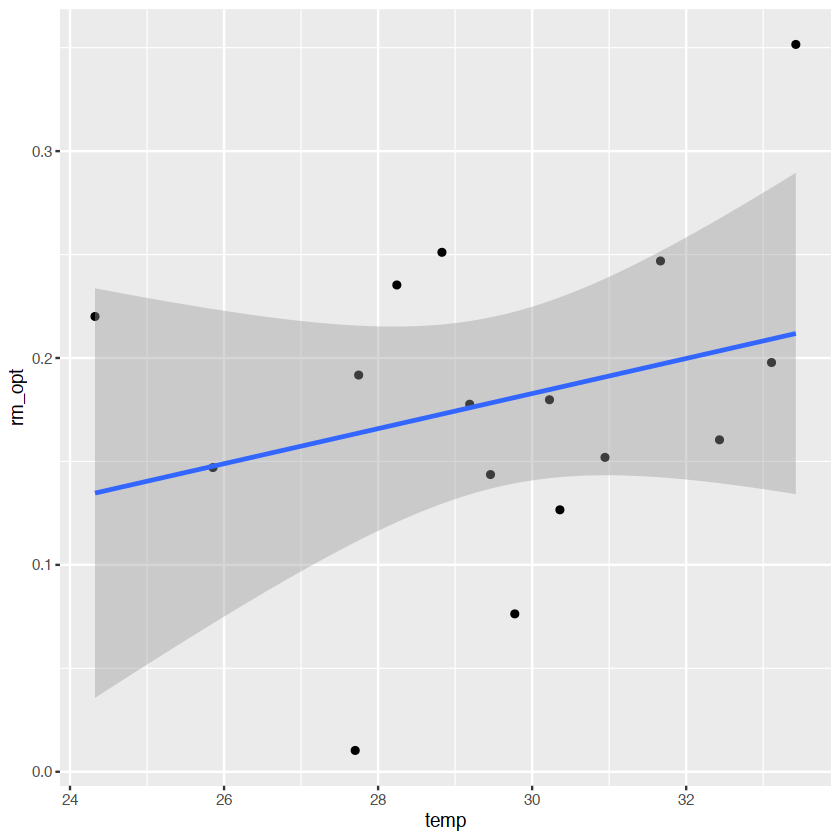

In [140]:
#plot uncorrected data in log-log scale
rm_data %>%
  ggplot(aes(x=log(mass), y = log(rm_opt)))+
  geom_point()+
  geom_smooth(method = 'lm')

#plot rm_opt vs T
rm_data %>%
  ggplot(aes(x = temp, y = rm_opt)) +
  geom_point()+
  geom_smooth(method = 'lm')

## Mass-correct $r_m$ values

In [141]:
# linear model (note the allometry is linear in log-log scale)
rm_model <- lm(log(rm_opt) ~ log(mass) + kT, data = rm_data)
summary(rm_model)
coef(rm_model)

save(rm_model,file= "../results/rm_MTE_model.Rdata")

cf <-  confint(rm_model,level = .95)
anova(rm_model)


Call:
lm(formula = log(rm_opt) ~ log(mass) + kT, data = rm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8199 -0.1019  0.1105  0.3271  0.7128 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 11.61659   20.90504   0.556   0.5879  
log(mass)   -0.17483    0.06415  -2.725   0.0173 *
kT          -0.34962    0.54546  -0.641   0.5327  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.662 on 13 degrees of freedom
Multiple R-squared:  0.3974,	Adjusted R-squared:  0.3047 
F-statistic: 4.286 on 2 and 13 DF,  p-value: 0.03718


(Intercept)   log(mass)          kT 
 11.6165942  -0.1748251  -0.3496167

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,3.5770082,3.5770082,8.1612548,0.0134803
kT,1,0.1800619,0.1800619,0.4108268,0.5326872
Residuals,13,5.6977889,0.4382915,NA,NA


In [142]:
rm_data

species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,zUpr,zj,zjLwr,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,319.804921,275.465005,1,1.436440,1.121607,1.961897,0.01799820,⋯,0.01475193,0.001623460,2.043007e-03,0.001342057,0.01,0.01029796,8.264924e-03,0.01267333,159.8000000,38.57209
Halyomorpha halys,29.77477,29.803247,34.801644,26.560714,2,6.254051,4.554398,7.961462,0.01385860,⋯,0.01161998,0.003232184,8.066385e-03,0.002886158,0.01,0.07630718,6.803280e-02,0.08009549,158.8100000,38.30825
Aedes aegypti,33.10811,5.430507,6.127546,4.998063,3,8.966715,7.036053,10.245358,0.04764627,⋯,0.03811462,0.099661965,1.390300e-01,0.076551191,0.01,0.19781352,1.852584e-01,0.19309717,1.9991667,37.89130
Anthonomus grandis,29.45946,11.006110,13.433526,9.905019,4,6.292496,5.375335,9.707858,0.04069540,⋯,0.03527753,0.036932530,4.083388e-02,0.034256786,0.01,0.14365573,1.317147e-01,0.15718676,15.6000000,38.34817
Paracoccus marginatus,27.74775,11.249195,14.345214,9.048877,5,14.925416,10.254063,46.015815,0.05028941,⋯,0.04536469,0.015482998,1.992631e-02,0.012954600,0.01,0.19174884,1.640582e-01,0.24364983,3.3650000,38.56632
Acyrthosiphon pisum,24.32432,6.716411,7.095765,6.380087,6,7.047066,6.716012,7.461219,0.08542108,⋯,0.08085102,0.077074000,9.648324e-02,0.058133260,0.01,0.22007128,2.065578e-01,0.23220396,2.3650000,39.01015
Aphis gossypii,28.24324,4.573511,4.816821,4.397817,7,3.206500,2.586690,3.743777,0.12279223,⋯,0.11812489,0.073481376,9.154254e-02,0.061931575,0.01,0.23529948,2.068812e-01,0.25424542,0.6633333,38.50291
Bemisia tabaci,30.22523,12.226305,13.059605,10.776319,8,9.793602,7.574906,11.875228,0.06851774,⋯,0.06243942,0.027618773,3.622507e-02,0.022064485,0.01,0.17981067,1.615976e-01,0.19778258,0.2931250,38.25137
Tetraneura nigriabdominalis,29.18919,8.639694,8.707438,8.580869,9,3.037762,2.571044,3.854296,0.08826039,⋯,0.08228120,0.010213679,1.249181e-02,0.008879533,0.01,0.17766166,1.694699e-01,0.18828090,0.8673000,38.38245


`geom_smooth()` using formula 'y ~ x'



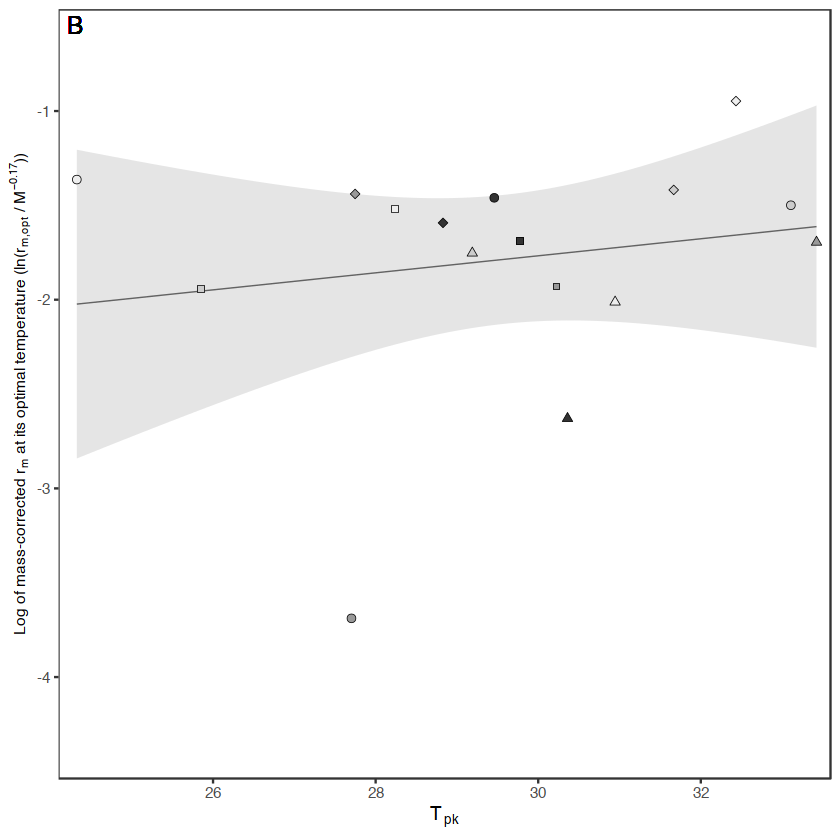

In [143]:
#plot rm_opt in 1/kT, correcting for mass
MassCorr_rm_opt <- 
rm_data %>%
  ggplot(aes(x = temp, y = log(rm_opt/mass^coef(rm_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("Log of mass-corrected ",italic(r[m]),
                                            " at its optimal temperature (ln(",
                                            italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.17),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(paste(italic(T[pk]))),
                     limits=c(24.1,33.6),
                     expand = c(0, 0),
                     breaks=seq(20,34, by=2))+
  geom_point(aes(shape = species, fill = species), size=2,stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.2, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "B"),size = 5, colour = "black")+
  theme(axis.title.y = element_text(size = 9))

MassCorr_rm_opt

# Analyses of $r_m$ vs distribution of trait $T_{pk}$s

#### Relationship of $r_{m,opt}$ vs distribution of trait $T_{pk}$'s

In [144]:
# sum of trait Tpks versus mass corrected r_m, opt

Species <- rm_data$species

alphaTpks <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), conf_upper = as.numeric(conf_upper))

zjTpks <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


zTpks <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

bmaxTpks <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

AllTpks <- bind_rows(alphaTpks,zjTpks,zTpks,bmaxTpks)

head(AllTpks)

# write_csv(AllTpks, '../results/AllTpkParams.csv')

param,species,estimate,conf_lower,conf_upper,trait
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
topt,Bemisia tabaci,29.751,29.29720,30.64074,juvenile development rate
topt,Tetraneura nigriabdominalis,30.648,30.55200,30.78080,juvenile development rate
topt,Stethorus punctillum,32.875,32.76915,32.97900,juvenile development rate
topt,Tetranychus mcdanieli,35.182,34.96051,35.80812,juvenile development rate
topt,Muscidifurax zaraptor,32.038,31.81556,32.34978,juvenile development rate
topt,Aphis nasturtii,30.874,29.87691,31.97949,juvenile development rate


In [145]:
load("../results/rm_MTE_model.Rdata") # Load linear model fitted in previous step (04_rmCalcs)

In [146]:
#prepare data for plotting
rm_data <- rm_data %>% 
           mutate(rm_massCor = rm_opt/mass^coef(rm_model)[2])
         
#Calculate variance and Sum

OptVar <- AllTpks %>% group_by(species) %>%
  summarise(variance = var(estimate))
OptSum <- AllTpks %>% group_by(species) %>%
  summarise(sum = sum(estimate))

In [147]:
PlotData <- left_join(rm_data, OptVar, by="species")
PlotData <- left_join(PlotData, OptSum, by="species")
head(PlotData)

write_csv(PlotData,'../results/rm_optSizeScaling_w_tpksums.csv')

species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,variance,sum
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,319.804921,275.465005,1,1.436440,1.121607,1.961897,0.01799820,⋯,0.001342057,0.01,0.01029796,0.008264924,0.01267333,159.800000,38.57209,0.02500296,59.55748,90.453
Halyomorpha halys,29.77477,29.803247,34.801644,26.560714,2,6.254051,4.554398,7.961462,0.01385860,⋯,0.002886158,0.01,0.07630718,0.068032804,0.08009549,158.810000,38.30825,0.18506915,43.70063,109.155
Aedes aegypti,33.10811,5.430507,6.127546,4.998063,3,8.966715,7.036053,10.245358,0.04764627,⋯,0.076551191,0.01,0.19781352,0.185258393,0.19309717,1.999167,37.89130,0.22328108,78.98463,108.436
Anthonomus grandis,29.45946,11.006110,13.433526,9.905019,4,6.292496,5.375335,9.707858,0.04069540,⋯,0.034256786,0.01,0.14365573,0.131714677,0.15718676,15.600000,38.34817,0.23222611,92.69264,90.861
Paracoccus marginatus,27.74775,11.249195,14.345214,9.048877,5,14.925416,10.254063,46.015815,0.05028941,⋯,0.012954600,0.01,0.19174884,0.164058195,0.24364983,3.365000,38.56632,0.23706255,39.68880,84.744
Acyrthosiphon pisum,24.32432,6.716411,7.095765,6.380087,6,7.047066,6.716012,7.461219,0.08542108,⋯,0.058133260,0.01,0.22007128,0.206557839,0.23220396,2.365000,39.01015,0.25581054,87.33796,70.595


In [148]:
# load simulaion results, filtering by only r_opt values of rows with predicted optimal order of T_pk's 

sim_results_opt <- read.csv("../results/sim_results.csv") %>% filter(Opt_T_pk_order == 1) 

sim_results_notopt <- read.csv("../results/sim_results.csv") %>% filter(Opt_T_pk_order == 0) 

head(sim_results_opt)

,T_pk_sums,T_pk_vars,r_m_opt,T_opt,Opt_T_pk_order
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,81.53854,103.71849,0.07250142,16.05,1
2,65.22241,114.33503,-0.01005402,10.30,1
3,84.72659,138.90059,0.03974080,13.45,1
4,80.22064,113.52081,0.05692468,14.55,1
5,61.86317,97.56244,0.04888265,13.70,1
6,91.28361,88.64286,0.12810141,19.20,1


## $r_m$ vs sum of trait  $T_{pk}$s

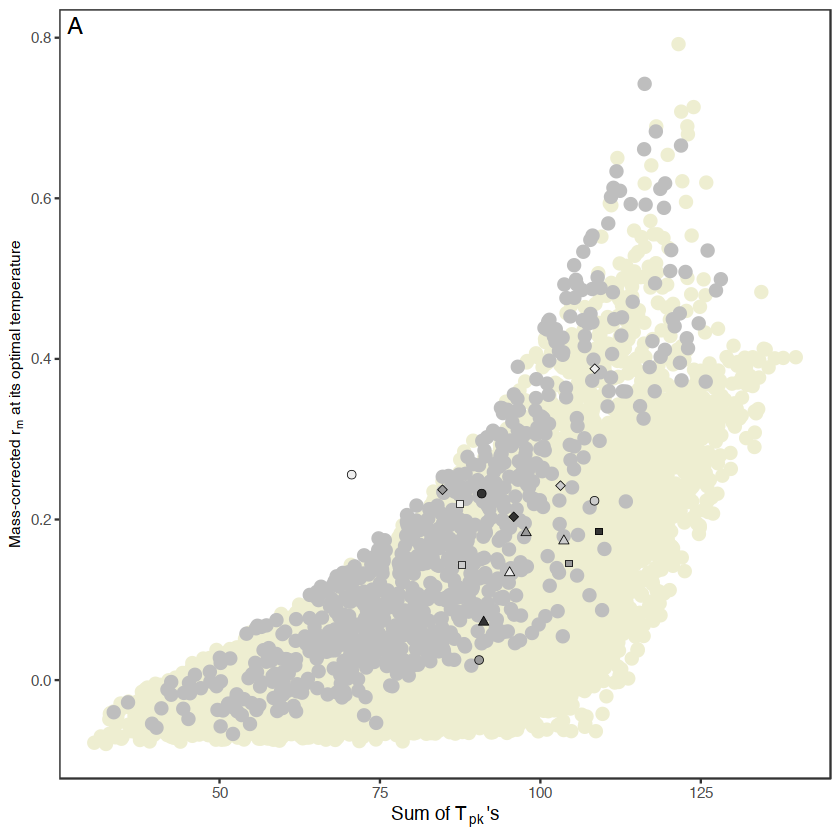

In [149]:
SumTpks_plot <-ggplot() +
  geom_point(data = sim_results_notopt, aes(x = T_pk_sums, y = r_m_opt), color="lightyellow2", size = 3) +
  geom_point(data = sim_results_opt, aes(x = T_pk_sums, y = r_m_opt), color="gray", size = 3) +
  scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m]),
                                            " at its optimal temperature"))),
                     # limits=c(-3.8,-0.5),
                     # expand = c(0.01, 0),breaks=seq(-3,-1, by=1)
                    ) +
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s")))) +
  theme_bw()+
  theme(text=element_text(family="Times")) + 
  geom_point(data = PlotData, aes(x = sum, y = rm_massCor, shape=species, fill=species), 
             size=2, stroke=0.25)+ 
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=16,ncol=1,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=1,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5)) + 
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  theme(panel.grid.minor = element_blank(),
        panel.grid.major = element_blank())+
theme(axis.title.y = element_text(size=9))+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "A"),size = 5, colour = "black")

SumTpks_plot

#ggsave("../results/Figs/rm_vs_SumTpks.pdf", SumTpks_plot, height=6.5, width = 7, units="cm")

## Relationship between $r_{m,opt}$ and $T_{pk}$ of (mass-corrected) $\alpha$ 

In [150]:
# Create argument containing target species
spps <- "case_when(species == 'Anoplophora glabripennis' ~ '1', 
        species == 'Halyomorpha halys' ~ '2', 
        species == 'Aedes aegypti' ~ '3',
        species == 'Anthonomus grandis' ~ '4',
        species == 'Paracoccus marginatus' ~ '5',
        species == 'Acyrthosiphon pisum' ~ '6',
        species == 'Aphis gossypii' ~ '7',
        species == 'Bemisia tabaci' ~ '8',
        species == 'Tetraneura nigriabdominalis' ~ '9',
        species == 'Stethorus punctillum' ~ '10',
        species == 'Tetranychus mcdanieli' ~ '11',
        species == 'Muscidifurax zaraptor' ~ '12',
        species == 'Aphis nasturtii' ~ '13',
        species == 'Rhopalosiphum maidis' ~ '14',
        species == 'Thrips hawaiiensis' ~ '15',
        species == 'Helicoverpa armigera' ~ '16')"


# Read in the trait data
alphaMass <- as_tibble(read.csv('../data/a_pksT_pksMass.csv')) %>% 
  select(species, a_pk, a_pkLwr, a_pkUpr) %>%
  filter(species == 'Anoplophora glabripennis' |
         species == 'Halyomorpha halys' |
         species == 'Aedes aegypti'|
         species == 'Anthonomus grandis' |
         species == 'Paracoccus marginatus' |
         species == 'Acyrthosiphon pisum' |
         species == 'Aphis gossypii' |
         species == 'Bemisia tabaci' |
         species == 'Tetraneura nigriabdominalis' |
         species == 'Stethorus punctillum' |
         species == 'Tetranychus mcdanieli' |
         species == 'Muscidifurax zaraptor' |
         species == 'Aphis nasturtii' |
         species == 'Rhopalosiphum maidis' |
         species == 'Thrips hawaiiensis' |
         species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

alphaMass

alpharm_data <- inner_join(rm_data, alphaMass)
alpharm_data

species,a_pk,a_pkLwr,a_pkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,0.003406889,0.003295157,0.004112839,1
Halyomorpha halys,0.044334971,0.036523743,0.051849594,2
Aedes aegypti,0.199835786,0.175990498,0.221197115,3
Anthonomus grandis,0.118202636,0.094728342,0.144751856,4
Paracoccus marginatus,0.091667630,0.073861283,0.126105051,5
Acyrthosiphon pisum,0.168491626,0.154817639,0.192274601,6
Aphis gossypii,0.221659340,0.209457031,0.229992249,7
Bemisia tabaci,0.082825022,0.078454869,0.094161539,8
Tetraneura nigriabdominalis,0.117949376,0.116954744,0.118896686,9


Joining, by = c("species", "curve_ID")


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,a_pk,a_pkLwr,a_pkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,319.804921,275.465005,1,1.436440,1.121607,1.961897,0.01799820,⋯,0.01,0.01029796,8.264924e-03,0.01267333,159.8000000,38.57209,0.02500296,0.003406889,0.003295157,0.004112839
Halyomorpha halys,29.77477,29.803247,34.801644,26.560714,2,6.254051,4.554398,7.961462,0.01385860,⋯,0.01,0.07630718,6.803280e-02,0.08009549,158.8100000,38.30825,0.18506915,0.044334971,0.036523743,0.051849594
Aedes aegypti,33.10811,5.430507,6.127546,4.998063,3,8.966715,7.036053,10.245358,0.04764627,⋯,0.01,0.19781352,1.852584e-01,0.19309717,1.9991667,37.89130,0.22328108,0.199835786,0.175990498,0.221197115
Anthonomus grandis,29.45946,11.006110,13.433526,9.905019,4,6.292496,5.375335,9.707858,0.04069540,⋯,0.01,0.14365573,1.317147e-01,0.15718676,15.6000000,38.34817,0.23222611,0.118202636,0.094728342,0.144751856
Paracoccus marginatus,27.74775,11.249195,14.345214,9.048877,5,14.925416,10.254063,46.015815,0.05028941,⋯,0.01,0.19174884,1.640582e-01,0.24364983,3.3650000,38.56632,0.23706255,0.091667630,0.073861283,0.126105051
Acyrthosiphon pisum,24.32432,6.716411,7.095765,6.380087,6,7.047066,6.716012,7.461219,0.08542108,⋯,0.01,0.22007128,2.065578e-01,0.23220396,2.3650000,39.01015,0.25581054,0.168491626,0.154817639,0.192274601
Aphis gossypii,28.24324,4.573511,4.816821,4.397817,7,3.206500,2.586690,3.743777,0.12279223,⋯,0.01,0.23529948,2.068812e-01,0.25424542,0.6633333,38.50291,0.21900560,0.221659340,0.209457031,0.229992249
Bemisia tabaci,30.22523,12.226305,13.059605,10.776319,8,9.793602,7.574906,11.875228,0.06851774,⋯,0.01,0.17981067,1.615976e-01,0.19778258,0.2931250,38.25137,0.14509182,0.082825022,0.078454869,0.094161539
Tetraneura nigriabdominalis,29.18919,8.639694,8.707438,8.580869,9,3.037762,2.571044,3.854296,0.08826039,⋯,0.01,0.17766166,1.694699e-01,0.18828090,0.8673000,38.38245,0.17329426,0.117949376,0.116954744,0.118896686


In [151]:
# linear model (note the allometry is linear in log-log scale)
alpharm_model <- lm(log(rm_opt/mass^-0.17) ~ log(a_pk/mass^-0.265), data = alpharm_data)
summary(alpharm_model)
anova(alpharm_model)


Call:
lm(formula = log(rm_opt/mass^-0.17) ~ log(a_pk/mass^-0.265), 
    data = alpharm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63934 -0.20043 -0.01637  0.16665  0.65206 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.2572     0.2669  -0.964    0.352    
log(a_pk/mass^-0.265)   0.7377     0.1218   6.058 2.95e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3409 on 14 degrees of freedom
Multiple R-squared:  0.7238,	Adjusted R-squared:  0.7041 
F-statistic: 36.69 on 1 and 14 DF,  p-value: 2.948e-05


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(a_pk/mass^-0.265),1,4.264355,4.2643554,36.69482,2.948448e-05
Residuals,14,1.626959,0.1162114,NA,NA


`geom_smooth()` using formula 'y ~ x'



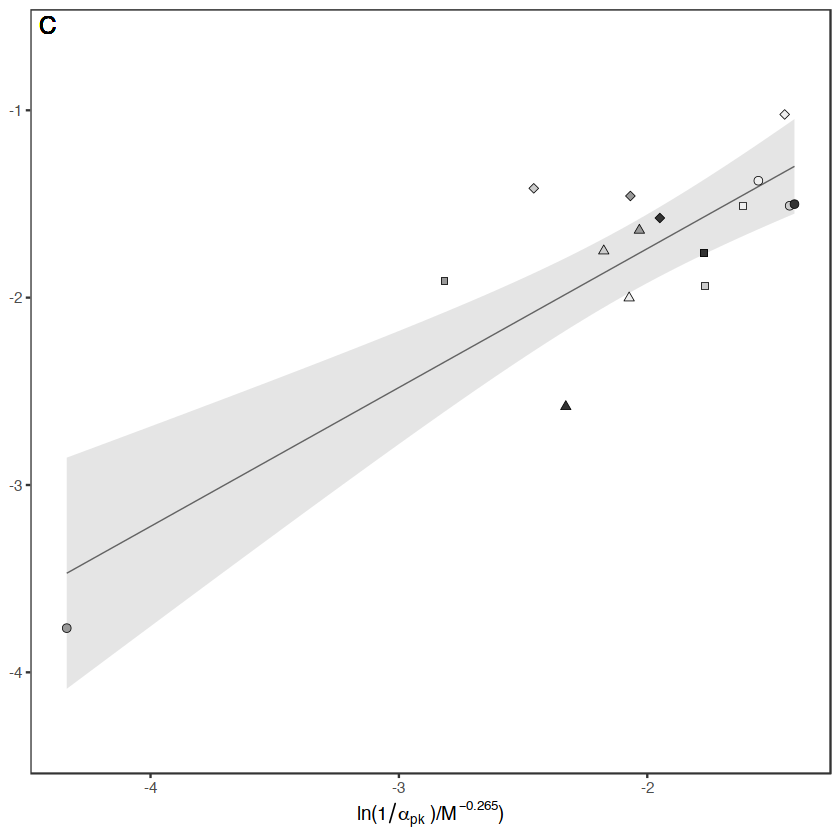

In [152]:
## plot $a_pk$ vs $r_opt$

MassCorr_rm_opt_vs_AlphaTpk <-
  alpharm_data %>%
  ggplot(aes(x=log(a_pk/mass^-0.265), y = log(rm_opt/mass^-0.16)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.16),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(1/alpha[pk])~")/",
                                            italic(M^-0.265),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.4))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "C"),size = 5, colour = "black")+
  theme(axis.title.y = element_blank())
  
#save_plot(MassCorr_rm_opt_vs_AlphaTpk, file="../results/Figs/MassCorr_rm_opt_vs_AlphaTpk.pdf", 
#          base_height=5,base_width = 5, base_asp = 0.75,units="cm")

MassCorr_rm_opt_vs_AlphaTpk

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Saving 7 x 7 in image

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



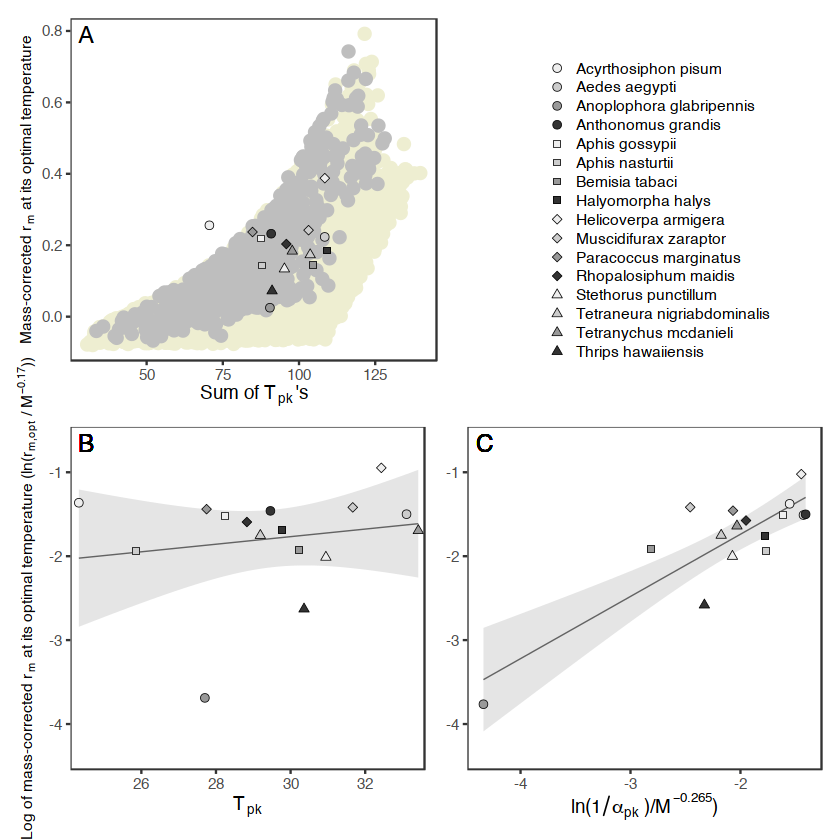

In [153]:
legend <- get_legend(MassCorr_rm_opt_vs_AlphaTpk + theme(legend.position = c(0.525,0.525)))

rm_calcs_Plot <- (SumTpks_plot+legend)/(MassCorr_rm_opt+MassCorr_rm_opt_vs_AlphaTpk)
                                     
rm_calcs_Plot

ggsave(rm_calcs_Plot, file="../results/Figs/rm_vs_SumTpks_rm_vs_Tpk_rm_vs_alphaPk.pdf")

## Relationship between $r_{m,opt}$ and $T_{pk}$s of other (mass-corrected) traits ($b_{max}$, $z$ and $z_J$) 

In [154]:
# bmax (fecundity)

betaMass <- as_tibble(read_csv('../data/bmaxT_pksMass.csv')) %>%
select(species, bmax, bmaxLwr, bmaxUpr) %>%
filter(species == 'Anoplophora glabripennis' |
         species == 'Halyomorpha halys' |
         species == 'Aedes aegypti'|
         species == 'Anthonomus grandis' |
         species == 'Paracoccus marginatus' |
         species == 'Acyrthosiphon pisum' |
         species == 'Aphis gossypii' |
         species == 'Bemisia tabaci' |
         species == 'Tetraneura nigriabdominalis' |
         species == 'Stethorus punctillum' |
         species == 'Tetranychus mcdanieli' |
         species == 'Muscidifurax zaraptor' |
         species == 'Aphis nasturtii' |
         species == 'Rhopalosiphum maidis' |
         species == 'Thrips hawaiiensis' |
         species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  rename(b_maxpk = bmax, b_maxpkLwr = bmaxLwr, b_maxpkUpr = bmaxUpr) %>%
  arrange(curve_ID)

betaMass

betarm_data <- inner_join(rm_data, betaMass)
betarm_data

Rows: 37 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): bmax, bmaxLwr, bmaxUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,b_maxpk,b_maxpkLwr,b_maxpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,1.439853,1.038105,1.950046,1
Halyomorpha halys,7.579694,5.862259,9.568001,2
Aedes aegypti,10.132196,9.024887,11.295703,3
Anthonomus grandis,7.287018,6.005141,11.723138,4
Paracoccus marginatus,26.757230,23.989200,32.815323,5
Acyrthosiphon pisum,7.239118,6.942937,7.804708,6
Aphis gossypii,3.301794,2.741228,3.821993,7
Bemisia tabaci,13.001684,9.730167,18.789040,8
Tetraneura nigriabdominalis,3.079183,2.503991,3.749182,9


Joining, by = c("species", "curve_ID")


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,b_maxpk,b_maxpkLwr,b_maxpkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,319.804921,275.465005,1,1.436440,1.121607,1.961897,0.01799820,⋯,0.01,0.01029796,8.264924e-03,0.01267333,159.8000000,38.57209,0.02500296,1.439853,1.038105,1.950046
Halyomorpha halys,29.77477,29.803247,34.801644,26.560714,2,6.254051,4.554398,7.961462,0.01385860,⋯,0.01,0.07630718,6.803280e-02,0.08009549,158.8100000,38.30825,0.18506915,7.579694,5.862259,9.568001
Aedes aegypti,33.10811,5.430507,6.127546,4.998063,3,8.966715,7.036053,10.245358,0.04764627,⋯,0.01,0.19781352,1.852584e-01,0.19309717,1.9991667,37.89130,0.22328108,10.132196,9.024887,11.295703
Anthonomus grandis,29.45946,11.006110,13.433526,9.905019,4,6.292496,5.375335,9.707858,0.04069540,⋯,0.01,0.14365573,1.317147e-01,0.15718676,15.6000000,38.34817,0.23222611,7.287018,6.005141,11.723138
Paracoccus marginatus,27.74775,11.249195,14.345214,9.048877,5,14.925416,10.254063,46.015815,0.05028941,⋯,0.01,0.19174884,1.640582e-01,0.24364983,3.3650000,38.56632,0.23706255,26.757230,23.989200,32.815323
Acyrthosiphon pisum,24.32432,6.716411,7.095765,6.380087,6,7.047066,6.716012,7.461219,0.08542108,⋯,0.01,0.22007128,2.065578e-01,0.23220396,2.3650000,39.01015,0.25581054,7.239118,6.942937,7.804708
Aphis gossypii,28.24324,4.573511,4.816821,4.397817,7,3.206500,2.586690,3.743777,0.12279223,⋯,0.01,0.23529948,2.068812e-01,0.25424542,0.6633333,38.50291,0.21900560,3.301794,2.741228,3.821993
Bemisia tabaci,30.22523,12.226305,13.059605,10.776319,8,9.793602,7.574906,11.875228,0.06851774,⋯,0.01,0.17981067,1.615976e-01,0.19778258,0.2931250,38.25137,0.14509182,13.001684,9.730167,18.789040
Tetraneura nigriabdominalis,29.18919,8.639694,8.707438,8.580869,9,3.037762,2.571044,3.854296,0.08826039,⋯,0.01,0.17766166,1.694699e-01,0.18828090,0.8673000,38.38245,0.17329426,3.079183,2.503991,3.749182


In [155]:
# linear model (note the allometry is linear in log-log scale)
betarm_model <- lm(log(rm_opt/mass^-0.17) ~ log(bmax/mass^0.08), data = betarm_data)
summary(betarm_model)
anova(betarm_model)


Call:
lm(formula = log(rm_opt/mass^-0.17) ~ log(bmax/mass^0.08), data = betarm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78443 -0.28328  0.07003  0.31449  0.59802 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -2.9001     0.2674 -10.846 3.39e-08 ***
log(bmax/mass^0.08)   0.6556     0.1455   4.507 0.000492 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4143 on 14 degrees of freedom
Multiple R-squared:  0.592,	Adjusted R-squared:  0.5629 
F-statistic: 20.32 on 1 and 14 DF,  p-value: 0.0004922


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(bmax/mass^0.08),1,3.487870,3.4878701,20.31675,0.0004921634
Residuals,14,2.403445,0.1716746,NA,NA


`geom_smooth()` using formula 'y ~ x'



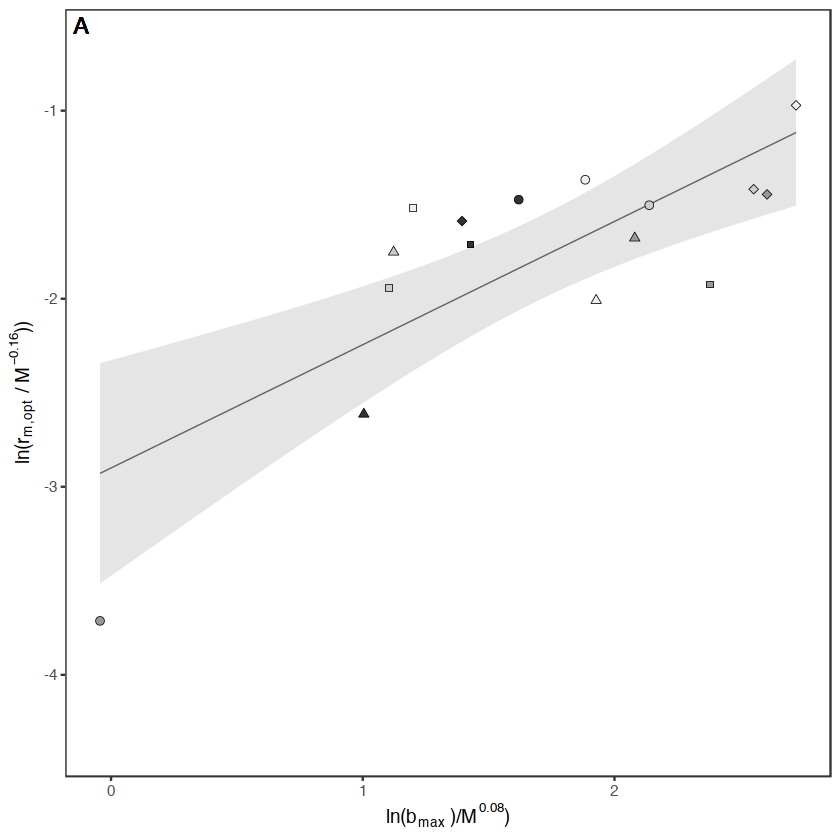

In [172]:
## plot $b_max$ vs $r_opt$

MassCorr_rm_opt_vs_BetaTpk <-
  betarm_data %>%
  ggplot(aes(x=log(bmax/mass^0.08), y = log(rm_opt/mass^-0.17)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.16),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(b[max])~")/",
                                            italic(M^0.08),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.4))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "A"),size = 5, colour = "black")#+
  #theme(axis.title.y = element_blank())
  

MassCorr_rm_opt_vs_BetaTpk

In [173]:
# z (adult mortality rate)

zMass <- as_tibble(read_csv('../data/z_pksT_pksMass.csv')) %>% 
         select(species, zpk, zpkLwr, zpkUpr) %>%
         filter(species == 'Anoplophora glabripennis' |
         species == 'Halyomorpha halys' |
         species == 'Aedes aegypti'|
         species == 'Anthonomus grandis' |
         species == 'Paracoccus marginatus' |
         species == 'Acyrthosiphon pisum' |
         species == 'Aphis gossypii' |
         species == 'Bemisia tabaci' |
         species == 'Tetraneura nigriabdominalis' |
         species == 'Stethorus punctillum' |
         species == 'Tetranychus mcdanieli' |
         species == 'Muscidifurax zaraptor' |
         species == 'Aphis nasturtii' |
         species == 'Rhopalosiphum maidis' |
         species == 'Thrips hawaiiensis' |
         species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

zMass
            

zrm_data <- inner_join(rm_data, zMass)

head(zrm_data)

Rows: 28 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zpk, zpkLwr, zpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,zpk,zpkLwr,zpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,0.006981302,0.008281079,0.006147864,1
Halyomorpha halys,0.004118571,0.004701301,0.002837968,2
Aedes aegypti,0.029080306,0.033464657,0.024541780,3
Anthonomus grandis,0.015650217,0.018062721,0.013832743,4
Paracoccus marginatus,0.021540255,0.026664929,0.019476293,5
Acyrthosiphon pisum,0.025069042,0.026753578,0.018624273,6
Aphis gossypii,0.032803103,0.033864906,0.032307552,7
Bemisia tabaci,0.039444080,0.041944304,0.036510612,8
Tetraneura nigriabdominalis,0.036046880,0.039294785,0.033277692,9


Joining, by = c("species", "curve_ID")


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,zpk,zpkLwr,zpkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,319.804921,275.465005,1,1.436440,1.121607,1.961897,0.01799820,⋯,0.01,0.01029796,0.008264924,0.01267333,159.800000,38.57209,0.02500296,0.006981302,0.008281079,0.006147864
Halyomorpha halys,29.77477,29.803247,34.801644,26.560714,2,6.254051,4.554398,7.961462,0.01385860,⋯,0.01,0.07630718,0.068032804,0.08009549,158.810000,38.30825,0.18506915,0.004118571,0.004701301,0.002837968
Aedes aegypti,33.10811,5.430507,6.127546,4.998063,3,8.966715,7.036053,10.245358,0.04764627,⋯,0.01,0.19781352,0.185258393,0.19309717,1.999167,37.89130,0.22328108,0.029080306,0.033464657,0.024541780
Anthonomus grandis,29.45946,11.006110,13.433526,9.905019,4,6.292496,5.375335,9.707858,0.04069540,⋯,0.01,0.14365573,0.131714677,0.15718676,15.600000,38.34817,0.23222611,0.015650217,0.018062721,0.013832743
Paracoccus marginatus,27.74775,11.249195,14.345214,9.048877,5,14.925416,10.254063,46.015815,0.05028941,⋯,0.01,0.19174884,0.164058195,0.24364983,3.365000,38.56632,0.23706255,0.021540255,0.026664929,0.019476293
Acyrthosiphon pisum,24.32432,6.716411,7.095765,6.380087,6,7.047066,6.716012,7.461219,0.08542108,⋯,0.01,0.22007128,0.206557839,0.23220396,2.365000,39.01015,0.25581054,0.025069042,0.026753578,0.018624273


In [174]:
# linear model (note the allometry is linear in log-log scale)
zrm_model <- lm(log(rm_opt/mass^-0.17) ~ log(zpk/mass^-0.124), data = zrm_data)
summary(zrm_model)
anova(zrm_model)


Call:
lm(formula = log(rm_opt/mass^-0.17) ~ log(zpk/mass^-0.124), data = zrm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6597 -0.1128  0.1364  0.2755  0.5880 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -0.03594    0.65245  -0.055   0.9568  
log(zpk/mass^-0.124)  0.46537    0.16968   2.743   0.0159 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5232 on 14 degrees of freedom
Multiple R-squared:  0.3495,	Adjusted R-squared:  0.303 
F-statistic: 7.522 on 1 and 14 DF,  p-value: 0.01587


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(zpk/mass^-0.124),1,2.058989,2.0589889,7.521762,0.01587445
Residuals,14,3.832326,0.2737376,NA,NA


`geom_smooth()` using formula 'y ~ x'



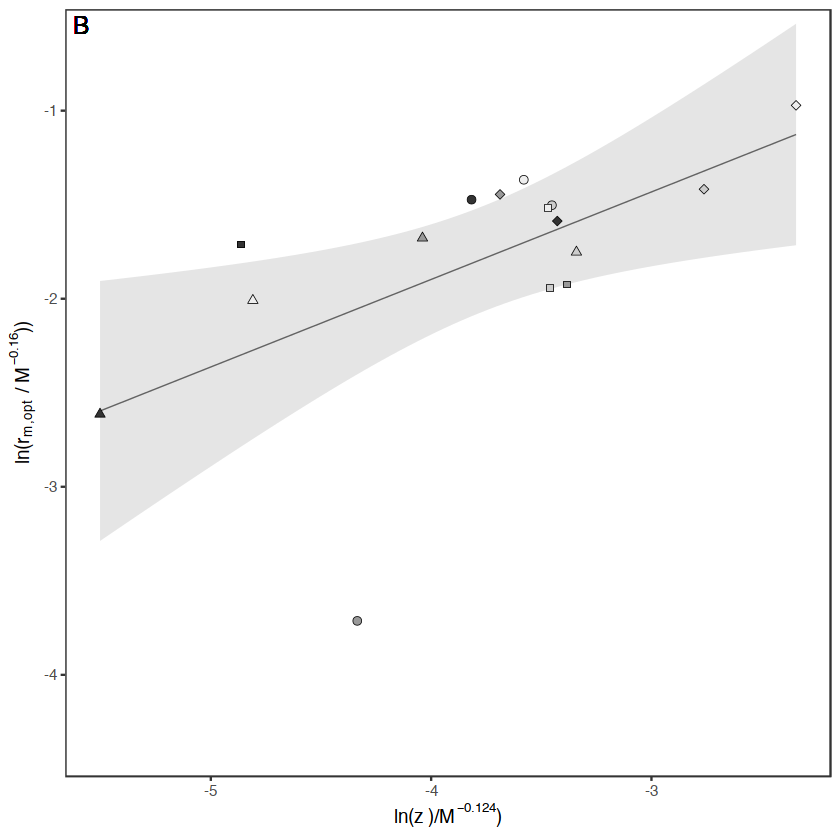

In [175]:
## plot $z$ vs $r_opt$

MassCorr_rm_opt_vs_zTpk <-
  zrm_data %>%
  ggplot(aes(x=log(zpk/mass^-0.124), y = log(rm_opt/mass^-0.17)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.16),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(z)~")/",
                                            italic(M^-0.124),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.4))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "B"),size = 5, colour = "black")#+
  #theme(axis.title.y = element_blank())
  

MassCorr_rm_opt_vs_zTpk

In [176]:
# $z_J$ (juvenile mortality rate)

zJMass <- as_tibble(read_csv('../data/zj_pksT_pksMass.csv')) %>% 
         select(species, zjpk, zjpkLwr, zjpkUpr) %>%
         filter(species == 'Anoplophora glabripennis' |
         species == 'Halyomorpha halys' |
         species == 'Aedes aegypti'|
         species == 'Anthonomus grandis' |
         species == 'Paracoccus marginatus' |
         species == 'Acyrthosiphon pisum' |
         species == 'Aphis gossypii' |
         species == 'Bemisia tabaci' |
         species == 'Tetraneura nigriabdominalis' |
         species == 'Stethorus punctillum' |
         species == 'Tetranychus mcdanieli' |
         species == 'Muscidifurax zaraptor' |
         species == 'Aphis nasturtii' |
         species == 'Rhopalosiphum maidis' |
         species == 'Thrips hawaiiensis' |
         species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

zJMass

zJrm_data <- inner_join(rm_data, zJMass)

head(zJrm_data)

Rows: 26 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zjpk, zjpkLwr, zjpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,zjpk,zjpkLwr,zjpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,0.0007652256,0.0008474433,0.0006736769,1
Halyomorpha halys,0.0021342229,0.0024461193,0.0017284115,2
Aedes aegypti,0.0201723996,0.0230265687,0.0174160171,3
Anthonomus grandis,0.0139869798,0.0148502020,0.0131855915,4
Paracoccus marginatus,0.0095941074,0.0123646019,0.0076872036,5
Acyrthosiphon pisum,0.0013182586,0.0013530820,0.0012905822,6
Aphis gossypii,0.0367776165,0.0423950624,0.0332624624,7
Bemisia tabaci,0.0128542251,0.0149496187,0.0107584870,8
Tetraneura nigriabdominalis,0.0093284409,0.0123577263,0.0082439675,9


Joining, by = c("species", "curve_ID")


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,zjpk,zjpkLwr,zjpkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,319.804921,275.465005,1,1.436440,1.121607,1.961897,0.01799820,⋯,0.01,0.01029796,0.008264924,0.01267333,159.800000,38.57209,0.02500296,0.0007652256,0.0008474433,0.0006736769
Halyomorpha halys,29.77477,29.803247,34.801644,26.560714,2,6.254051,4.554398,7.961462,0.01385860,⋯,0.01,0.07630718,0.068032804,0.08009549,158.810000,38.30825,0.18506915,0.0021342229,0.0024461193,0.0017284115
Aedes aegypti,33.10811,5.430507,6.127546,4.998063,3,8.966715,7.036053,10.245358,0.04764627,⋯,0.01,0.19781352,0.185258393,0.19309717,1.999167,37.89130,0.22328108,0.0201723996,0.0230265687,0.0174160171
Anthonomus grandis,29.45946,11.006110,13.433526,9.905019,4,6.292496,5.375335,9.707858,0.04069540,⋯,0.01,0.14365573,0.131714677,0.15718676,15.600000,38.34817,0.23222611,0.0139869798,0.0148502020,0.0131855915
Paracoccus marginatus,27.74775,11.249195,14.345214,9.048877,5,14.925416,10.254063,46.015815,0.05028941,⋯,0.01,0.19174884,0.164058195,0.24364983,3.365000,38.56632,0.23706255,0.0095941074,0.0123646019,0.0076872036
Acyrthosiphon pisum,24.32432,6.716411,7.095765,6.380087,6,7.047066,6.716012,7.461219,0.08542108,⋯,0.01,0.22007128,0.206557839,0.23220396,2.365000,39.01015,0.25581054,0.0013182586,0.0013530820,0.0012905822


In [177]:
# linear model (note the allometry is linear in log-log scale)
zJrm_model <- lm(log(rm_opt/mass^-0.17) ~ log(zjpk/mass^-0.193), data = zJrm_data)
summary(zJrm_model)
anova(zJrm_model)


Call:
lm(formula = log(rm_opt/mass^-0.16) ~ log(zjpk/mass^-0.193), 
    data = zJrm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64877 -0.12485  0.08454  0.27575  0.79709 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)            -0.7816     0.7780  -1.005    0.332
log(zjpk/mass^-0.193)   0.2152     0.1620   1.329    0.205

Residual standard error: 0.6131 on 14 degrees of freedom
Multiple R-squared:  0.112,	Adjusted R-squared:  0.04856 
F-statistic: 1.766 on 1 and 14 DF,  p-value: 0.2052


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(zjpk/mass^-0.193),1,0.6636961,0.6636961,1.765566,0.2051835
Residuals,14,5.2627581,0.3759113,NA,NA


`geom_smooth()` using formula 'y ~ x'



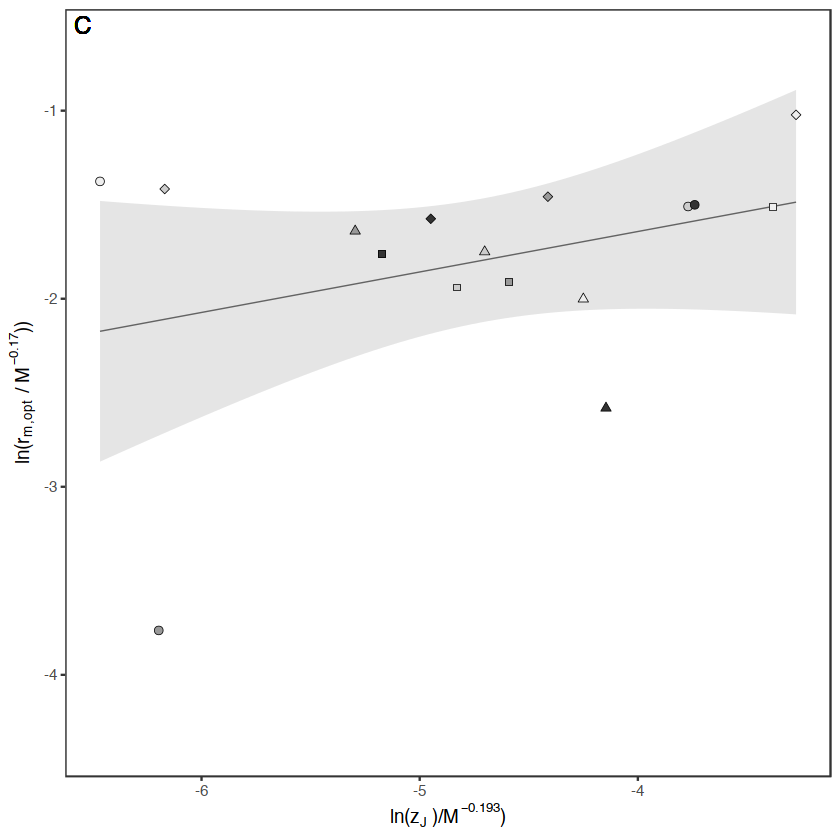

In [178]:
## plot $z_J$ vs $r_opt$

MassCorr_rm_opt_vs_zJTpk <-
  zJrm_data %>%
  ggplot(aes(x=log(zjpk/mass^-0.193), y = log(rm_opt/mass^-0.17)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.17),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(z[J])~")/",
                                            italic(M^-0.193),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.4))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "C"),size = 5, colour = "black")#+
  #theme(axis.title.y = element_blank())
  

MassCorr_rm_opt_vs_zJTpk

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Saving 7 x 7 in image

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



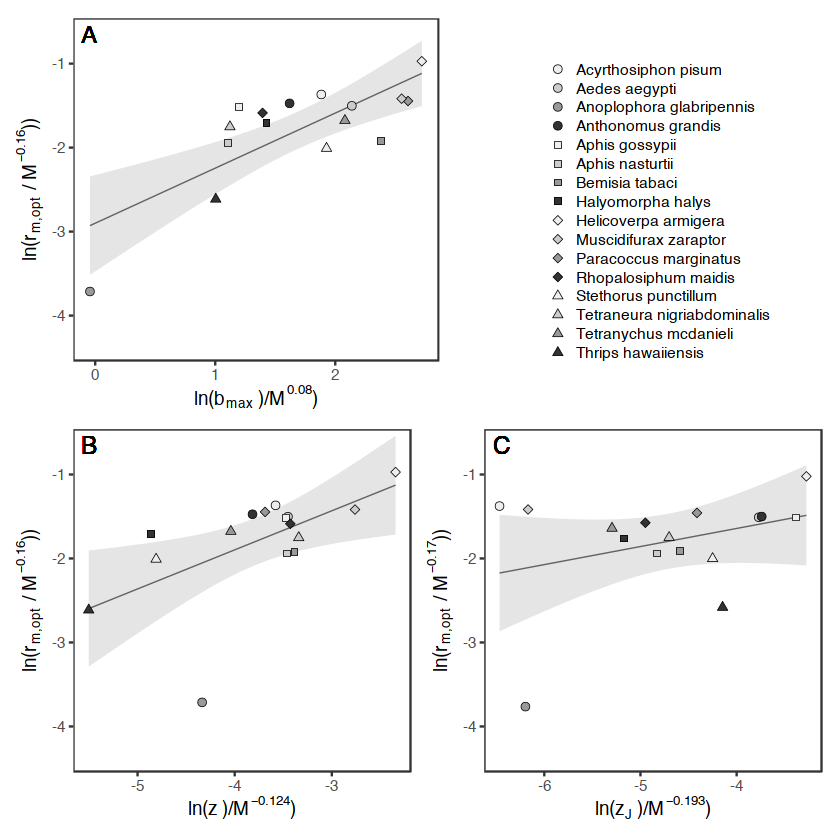

In [179]:
legend <- get_legend(MassCorr_rm_opt_vs_AlphaTpk + theme(legend.position = c(0.525,0.525)))

rm_vs_OtherTraitPks <- (MassCorr_rm_opt_vs_BetaTpk+legend)/
                       (MassCorr_rm_opt_vs_zTpk+MassCorr_rm_opt_vs_zJTpk)
                                     
rm_vs_OtherTraitPks

ggsave(rm_vs_OtherTraitPks, file="../results/SI/rm_vs_OtherTraitPks.pdf")

## $r_m$ vs Variance of trait  $T_{pk}$s 

In [180]:
VarLM <-   lm(PlotData$rm_massCor ~ PlotData$variance)

summary(VarLM)


Call:
lm(formula = PlotData$rm_massCor ~ PlotData$variance)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.166766 -0.047365  0.001854  0.043439  0.194782 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)        1.971e-01  6.972e-02   2.827   0.0135 *
PlotData$variance -8.912e-05  1.037e-03  -0.086   0.9327  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08495 on 14 degrees of freedom
Multiple R-squared:  0.0005273,	Adjusted R-squared:  -0.07086 
F-statistic: 0.007386 on 1 and 14 DF,  p-value: 0.9327


`geom_smooth()` using formula 'y ~ x'



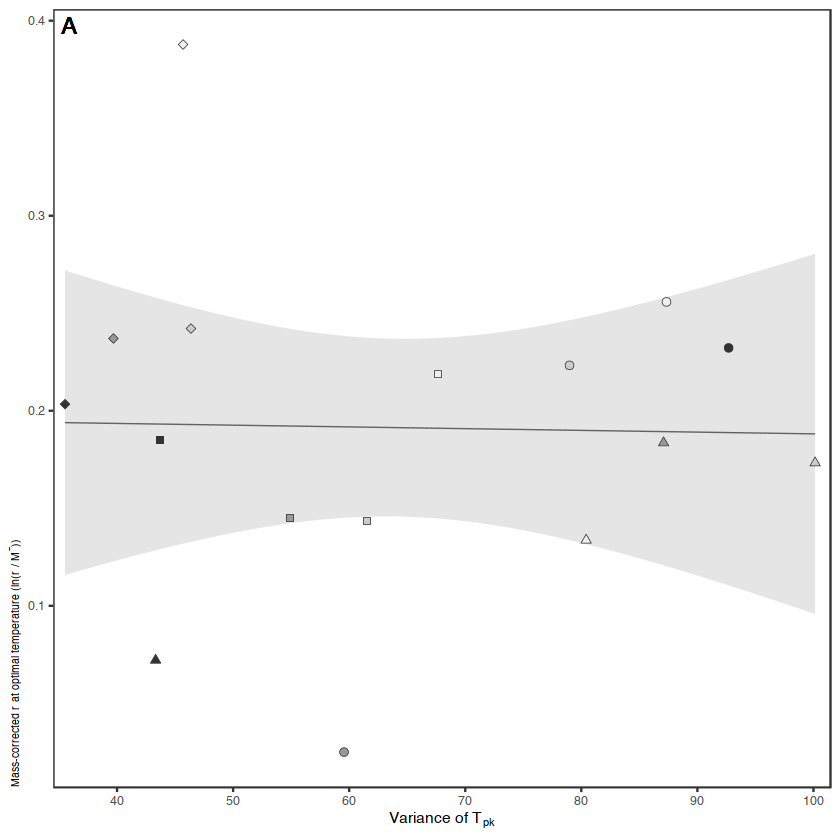

In [181]:
Var_rm <- ggplot(PlotData, aes(x=variance, y=rm_massCor, colour = species, fill = species)) +
  scale_x_continuous(expression(plain(paste("Variance of ", italic(T)[pk]))),
                     limits =c(34.5,101.5),
                     expand = c(0, 0),
                     breaks=seq(40,100, by=10))+
  scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m]),
                                            " at optimal temperature (ln(",italic(r[paste(m,",", opt)]),
                                            " / ", italic(M^-0.16),"))"))))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  geom_point(aes(shape=species, 
                 fill=species), size=2,stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=8,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=9),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.title.y = element_text(size=6, hjust=0))+
geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "A"),size = 5, colour = "black")

  
Var_rm

## Relationship between Sum and Variance of trait $T_{pk}$'s 

`geom_smooth()` using formula 'y ~ x'



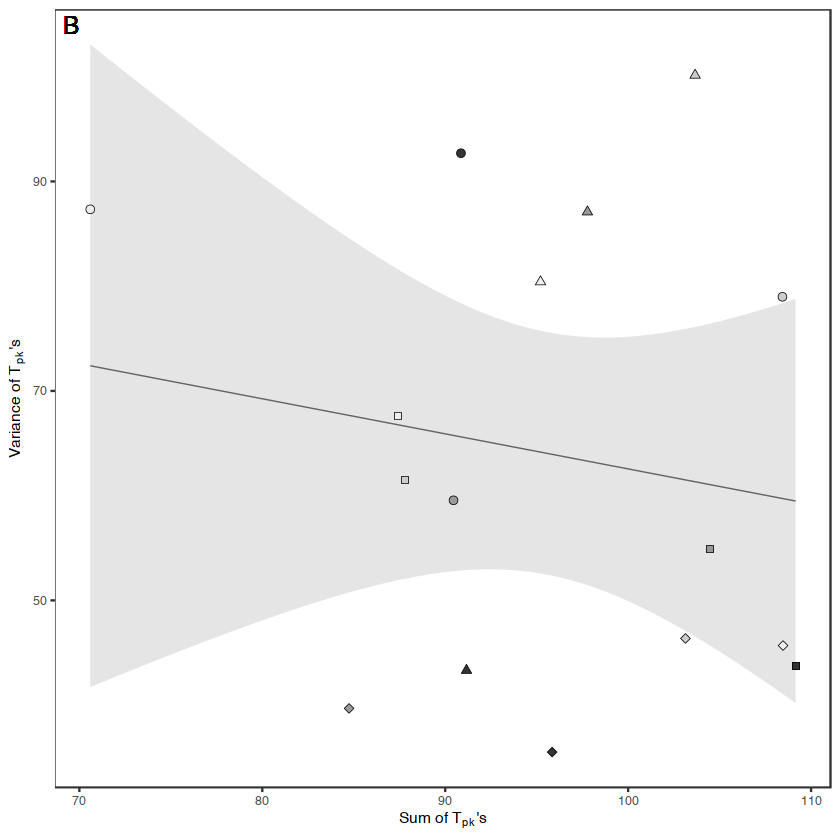

In [182]:
Sum_vs_Var_Tpks_plot <- PlotData %>%
  ggplot(aes(x = sum, y = variance))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("Variance of ",italic("T"[pk]),"'s"))))+
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=8,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=9),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "B"),size = 5, colour = "black")+
  theme(axis.title.y = element_text(hjust=0.5), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

Sum_vs_Var_Tpks_plot

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



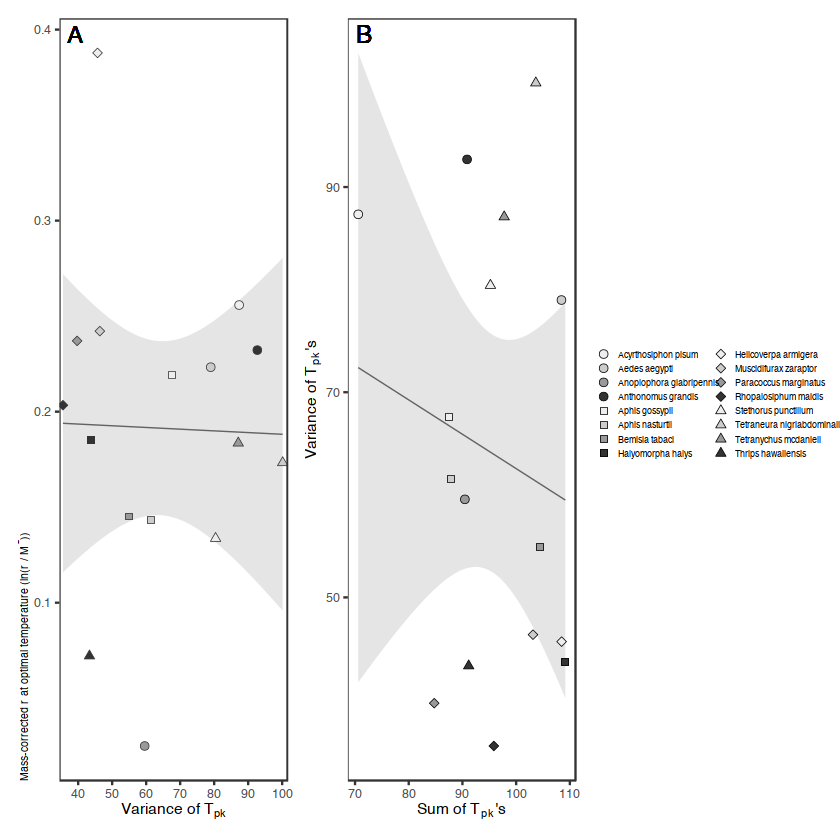

In [183]:
legendz <- get_legend(Sum_vs_Var_Tpks_plot + theme(legend.position = c(0.525,0.525), 
                     legend.text = element_text(size = 5, face = 'italic')))

rm_vs_Var_and_Sum <- (Var_rm+Sum_vs_Var_Tpks_plot+legendz)
                                     
rm_vs_Var_and_Sum

ggsave(rm_vs_Var_and_Sum, file="../results/SI/rm_vs_Var_and_Sum.pdf", height=6.5, width = 20, units="cm")